# Missing Data

- We need to deal with missing data. 
- Most algorithms will not work if data is missing.
- There are no hard rules for how to treat missing data.

There are several ways to handle missing data:
    
1. Remove any row with missing data
1. Remove any column with missing data
1. Impute missing values
1. Create an indicator column to signify data was missing

In [2]:
import pandas as pd
url = (
    "http://biostat.mc.vanderbilt.edu/"
    "wiki/pub/Main/DataSets/titanic3.xls"
)
df = pd.read_excel(url)

## Examining Missing Data

In [3]:
df.isnull().mean() * 100

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

To visualize missing data, we can use the `missingno` library. This allows uss to view contiguous areas of missing data, which would indicate that the missing data is not random.

The `matrix` function includes a sparkline along the right. Patterns here indicate nonrandom missing data. You may need to limit the number of samples to see a pattern. 

*Where data is missing. No clear pattern jumps out.*

In [4]:
import missingno as msno

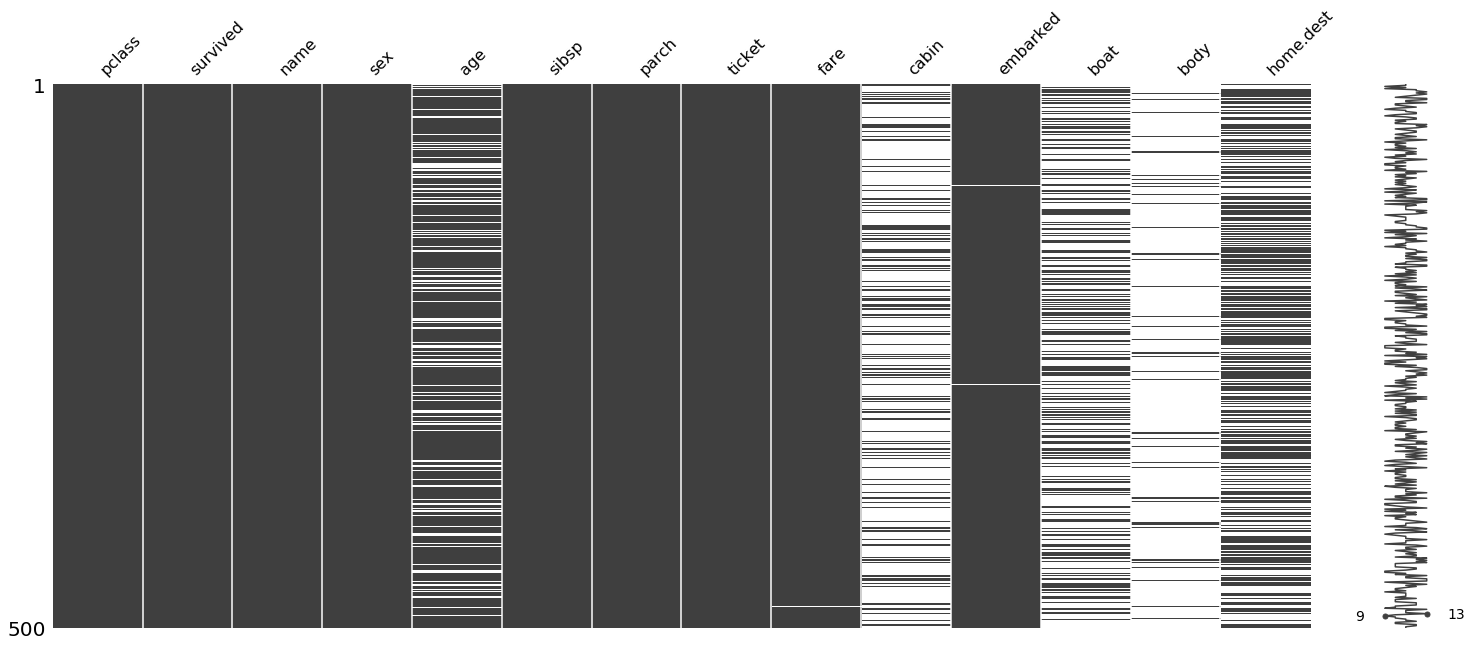

In [5]:
msno.matrix(df.sample(500));

Here is a bar plot of missing data counts.

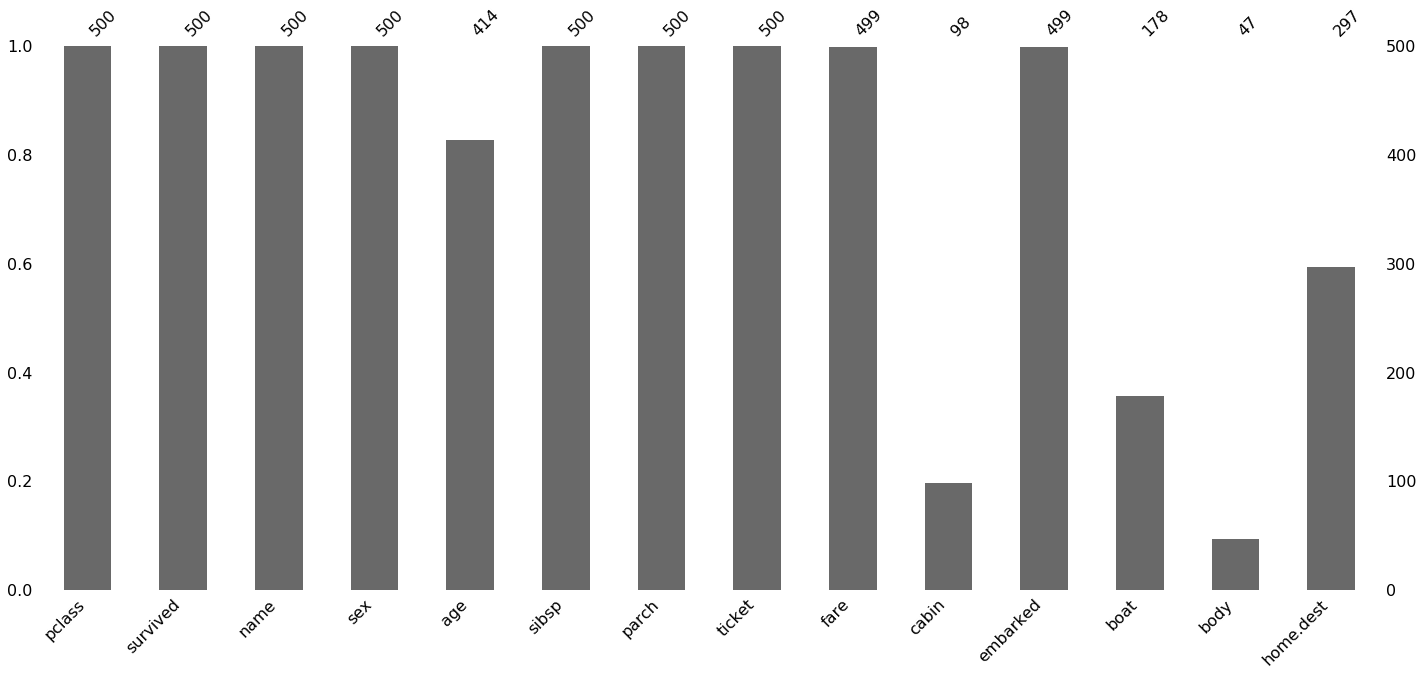

In [6]:
msno.bar(df.sample(500));

Create a heat map showing if there are correlations where data is missing. 

*There doesn't seem to be correlated missing data here*

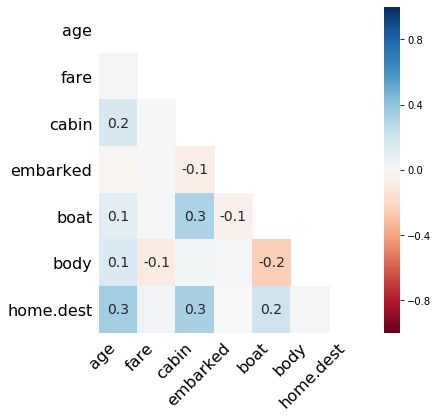

In [7]:
msno.heatmap(df, figsize=(6,6));

Create a dendrogram showing the clusterings of where data is missing. 

Leaves that are at the same level predict one another's presence (empty or filled). The vertical arms are used to indicate how different clusters are. Short arms mean that branches are similar. 

*The columns without missing data are on the upper right*

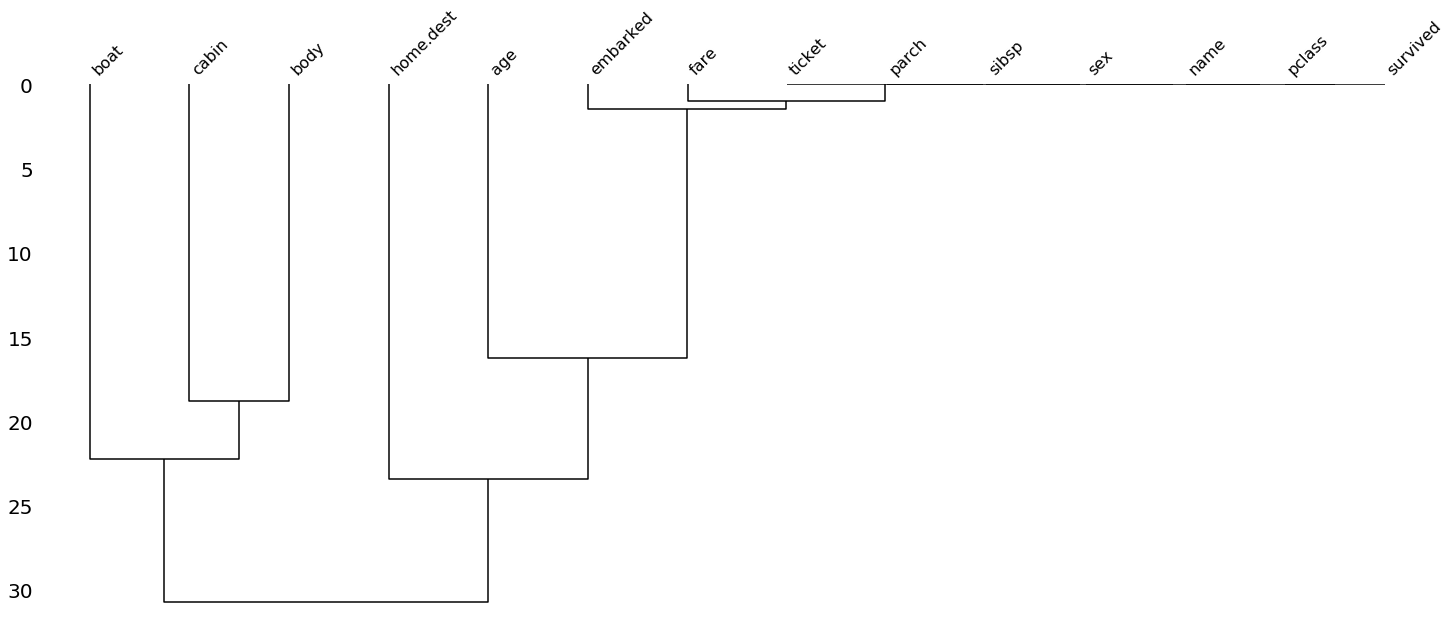

In [8]:
msno.dendrogram(df);

## Drop Missing Data

*This should be a last resort option*

Use the `.dropna()` method:

In [10]:
df1 = df.dropna() # Drops all rows with missing data

In [11]:
# Pass in a list of columns or single column 
# This drops the WHOLE column
df1 = df.drop(columns="cabin") 

In [21]:
# We could also use the dropna with axis = 1
df1 = df.dropna(axis=1)

## Imputing Data

The task of defining values for missing values is called *imputation*.

When you are imputing data, you need to build a pipeline and use the same imputation logic during the model creation and prediction time. 

The `SimpleImputer` class in scikit-learn handles mean, median, and most frequent feature values.

The default behavior is to calculate the mean:

In [22]:
from sklearn.impute import SimpleImputer

In [24]:
num_cols = df.select_dtypes(include="number").columns

In [25]:
im = SimpleImputer() #mean

Provide `strategy='median'` or `strategy='most_frequent'` to change the replaced value to median or most common. 

If you want to fill with a constant value, say -1, use `strategy='constant', fill_value=-1`

In [26]:
imputed = im.fit_transform(df[num_cols])

Most frequent and constant strategies can be used with string or numeric data. Aggregators require numeric data.

# Cleaning Data

We can use pandas and pyjanitor to assist with data cleaning.

In [12]:
import janitor as jn

## Column Names

When using pandas, we should have Python friendly column names. The pyjanitor clean_names function returns a DataFrame with columns in lowercase and spaces replaced by underscores.

In [16]:
X_bad = pd.DataFrame({
    "A" : [1, None, 3],
    " sales numbers ": [20.0, 30.0, None]
})

In [17]:
X_bad

,A,sales numbers
0,1.0,20.0
1,NaN,30.0
2,3.0,NaN


In [15]:
jn.clean_names(X_bad)

,a,_sales_numbers_
0,1.0,20.0
1,NaN,30.0
2,3.0,NaN


This is handy, but it doesn't take into account leading or trailing whitespace. The function below does.

In [33]:
def clean_col(name):
    return name.strip().lower().replace(" ","_")

In [34]:
X_bad.rename(columns=clean_col)

,a,sales_numbers
0,1.0,20.0
1,NaN,30.0
2,3.0,NaN


## Replace Missing Values
The `coalesce` function in pyjanitor takes a DataFrame and a list of coluimns to consider. This is similar to functionality found in SQL databases. It returns the first non-null value for each row:

In [36]:
jn.coalesce(X_bad, column_names=["A"," sales numbers "], 
            new_column_name="val")

,val
0,1.0
1,30.0
2,3.0


Filling missing values with a particular value:

In [18]:
X_bad.fillna(10)

,A,sales numbers
0,1.0,20.0
1,10.0,30.0
2,3.0,10.0


In [19]:
X_bad.fillna("HELLO!!! PEOPLE!!!")

,A,sales numbers
0,1,20
1,HELLO!!! PEOPLE!!!,30
2,3,HELLO!!! PEOPLE!!!
